# <p style="padding:10px;background-color:light green;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Lung Cancer Analysis & Prediction</p>

<p style="text-align:center; ">
<img src="https://st.depositphotos.com/1909187/4810/i/450/depositphotos_48100511-stock-photo-lung-cancer-tumor-detail.jpg" style='width: 300px; height: 300px;'>
</p>


<p style="text-align:justify; ">
    
Lung cancer is a type of cancer that begins in the lungs. Lungs are two spongy organs in our chest that take in oxygen when we inhale and release carbon dioxide when we exhale.
Lung cancer is the leading cause of cancer deaths worldwide.<br>
<br>
People who smoke have the greatest risk of lung cancer, though lung cancer can also occur in people who have never smoked. The risk of lung cancer increases with the length of time and number of cigarettes someone's smoked. If someone quits smoking, even after smoking for many years, he/she can significantly reduce the chances of developing lung cancer.
</p> 


    

   
  

<a id="1"></a>
# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="2"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

* **GENDER :** M [Male] , F [Female]
* **AGE :** Age of patients
* **SMOKING :** 2 [Yes] , 1 [No] 
* **YELLOW_FINGERS :** 2 [Yes] , 1 [No]  
* **ANXIETY :** 2 [Yes] , 1 [No] 
* **PEER_PRESSURE :** 2 [Yes] , 1 [No] 
* **CHRONIC DISEASE :** 2 [Yes] , 1 [No] 
* **FATIGUE :** 2 [Yes] , 1 [No] 
* **ALLERGY :** 2 [Yes] , 1 [No] 
* **WHEEZING :** 2 [Yes] , 1 [No] 
* **ALCOHOL CONSUMING :** 2 [Yes] , 1 [No] 
* **COUGHING :** 2 [Yes] , 1 [No] 
* **SHORTNESS OF BREATH :** 2 [Yes] , 1 [No] 
* **SWALLOWING DIFFICULTY :** 2 [Yes] , 1 [No] 
* **CHEST PAIN :** 2 [Yes] , 1 [No] 
* **LUNG_CANCER :** YES [Positive] , NO [Negative] 

In [3]:
data = pd.read_csv(r"C:\Users\Kalpana\OneDrive\Desktop\survey lung cancer.csv")

<a id="3"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>
<br>

**Let's have a glimpse of the dataset.**

In [4]:
print(f"Shape of The Dataset : {data.shape}")
print(f"\nGlimpse of The Dataset :")
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (12, 16)

Glimpse of The Dataset :


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,0,0,1,0,1,0,1,1,1,1,1,1,NO
1,F,74,1,1,1,0,0,1,1,1,0,0,1,1,0,YES
2,M,59,1,1,1,1,1,1,0,1,1,1,1,0,1,YES
3,F,63,1,0,1,0,1,0,1,0,1,1,1,0,1,YES
4,M,45,1,1,1,1,0,1,0,1,1,1,0,1,1,NO


In [5]:
print(f"Informations About The Dataset :\n")
print(data.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 12 non-null     object
 1   AGE                    12 non-null     int64 
 2   SMOKING                12 non-null     int64 
 3   YELLOW_FINGERS         12 non-null     int64 
 4   ANXIETY                12 non-null     int64 
 5   PEER_PRESSURE          12 non-null     int64 
 6   CHRONIC DISEASE        12 non-null     int64 
 7   FATIGUE                12 non-null     int64 
 8   ALLERGY                12 non-null     int64 
 9   WHEEZING               12 non-null     int64 
 10  ALCOHOL CONSUMING      12 non-null     int64 
 11  COUGHING               12 non-null     int64 
 12  SHORTNESS OF BREATH    12 non-null     int64 
 13  SWALLOWING DIFFICULTY  12 non-null     int64 
 14  CHEST PAIN             12 non-null     int

<a id="4"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [6]:
print(f"Summary of This Dataset :")
data.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of This Dataset :


,count,mean,std,min,25%,50%,75%,max
AGE,12.000000,56.166667,11.304330,38.000000,48.000000,58.500000,63.750000,74.000000
SMOKING,12.000000,0.666667,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000
YELLOW_FINGERS,12.000000,0.583333,0.514929,0.000000,0.000000,1.000000,1.000000,1.000000
ANXIETY,12.000000,0.833333,0.389249,0.000000,1.000000,1.000000,1.000000,1.000000
PEER_PRESSURE,12.000000,0.750000,0.452267,0.000000,0.750000,1.000000,1.000000,1.000000
CHRONIC DISEASE,12.000000,0.500000,0.522233,0.000000,0.000000,0.500000,1.000000,1.000000
FATIGUE,12.000000,0.833333,0.389249,0.000000,1.000000,1.000000,1.000000,1.000000
ALLERGY,12.000000,0.416667,0.514929,0.000000,0.000000,0.000000,1.000000,1.000000
WHEEZING,12.000000,0.833333,0.389249,0.000000,1.000000,1.000000,1.000000,1.000000
ALCOHOL CONSUMING,12.000000,0.583333,0.514929,0.000000,0.000000,1.000000,1.000000,1.000000


In [7]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
GENDER,12,2,M,6
LUNG_CANCER,12,2,YES,7


In [8]:
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Here, we can see there is **no null value** exists in this dataset. Let's check if there exists any duplicate entry in this dataset. If exists then we will remove them from the dataset. After that we will initialize the visualization style and custom pallete for visualization.

In [9]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 0 duplicate entries among 12 entries in this dataset.

After removing duplicate entries there are 12 entries in this dataset.


<a id="5"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Digging Deeper</p>



Let's replace all the **numeric values** into **categorical values** for better and efficient visualization. All the **2**'s and **1**'s will be replaced by **"YES"** and **"NO"** accordingly. And replace **"M"** and **"F"** by **"Male"** and **"Female"** accordingly in **"GENDER"** column.

In [10]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})    

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,0,0,0,No,0,No,0,No,No,No,No,No,No,NO
1,Female,74,No,No,No,0,0,No,No,No,0,0,No,No,0,YES
2,Male,59,No,No,No,No,No,No,0,No,No,No,No,0,No,YES
3,Female,63,No,0,No,0,No,0,No,0,No,No,No,0,No,YES
4,Male,45,No,No,No,No,0,No,0,No,No,No,0,No,No,NO


<a id="6"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [42]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)

palette = ["#1d3178","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

# sns.palplot(sns.color_palette(palette))
# plt.show()

<a id="7"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Positive Lung Cancer Cases</p>

Let's create a new dataframe containing only positive cases data.

In [43]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
1,Female,74,No,No,No,0,0,No,No,No,0,0,No,No,0,YES
2,Male,59,No,No,No,No,No,No,0,No,No,No,No,0,No,YES
3,Female,63,No,0,No,0,No,0,No,0,No,No,No,0,No,YES
6,Male,52,No,No,No,No,No,No,0,No,No,No,No,No,No,YES
8,Male,66,No,No,No,No,0,No,0,No,No,No,No,No,No,YES


<a id="8"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Positive Cases' Age Distribution</p>

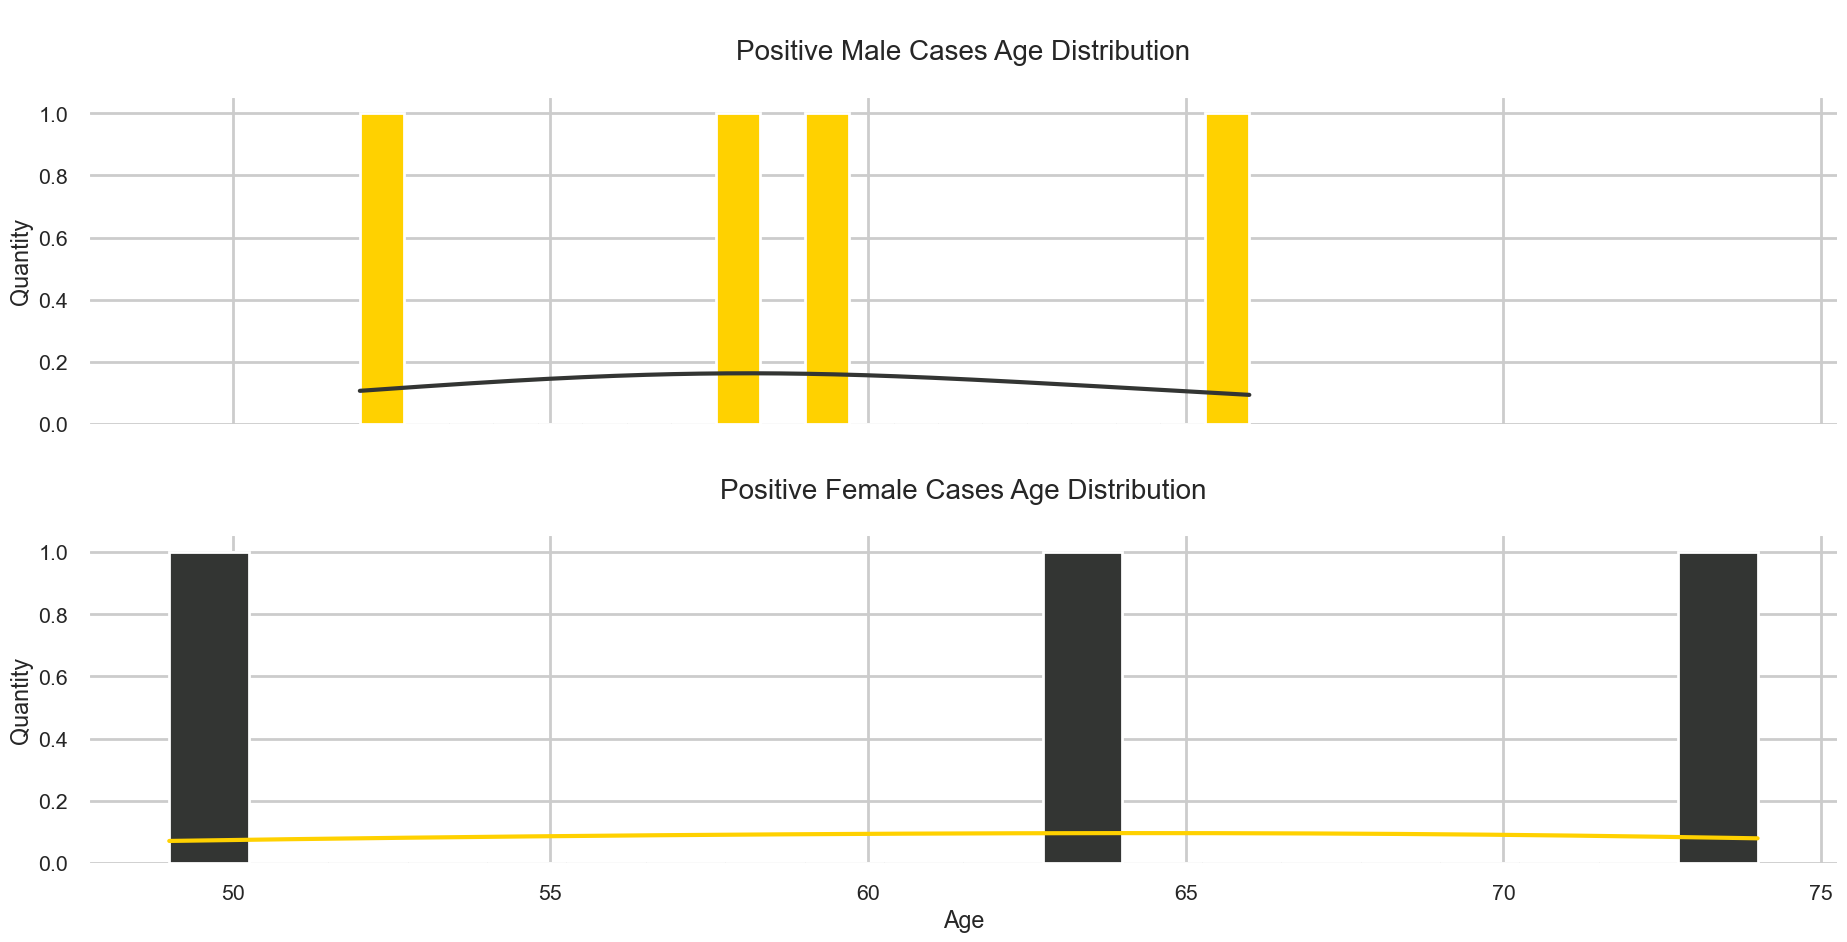

In [44]:
_, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True, sharey=True)
plt.tight_layout(pad=4.0)

# Male Plot
sns.histplot(
    data_temp_pos[data_temp_pos["GENDER"] == "Male"]["AGE"],
    color=palette[11], kde=True, ax=axs[0], bins=20, alpha=1, fill=True
)
if axs[0].lines:
    axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases Age Distribution\n", fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

# Female Plot
sns.histplot(
    data_temp_pos[data_temp_pos["GENDER"] == "Female"]["AGE"],
    color=palette[12], kde=True, ax=axs[1], bins=20, alpha=1, fill=True
)
if axs[1].lines:
    axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases Age Distribution\n", fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()


**Let's stack them together in a same figure.**

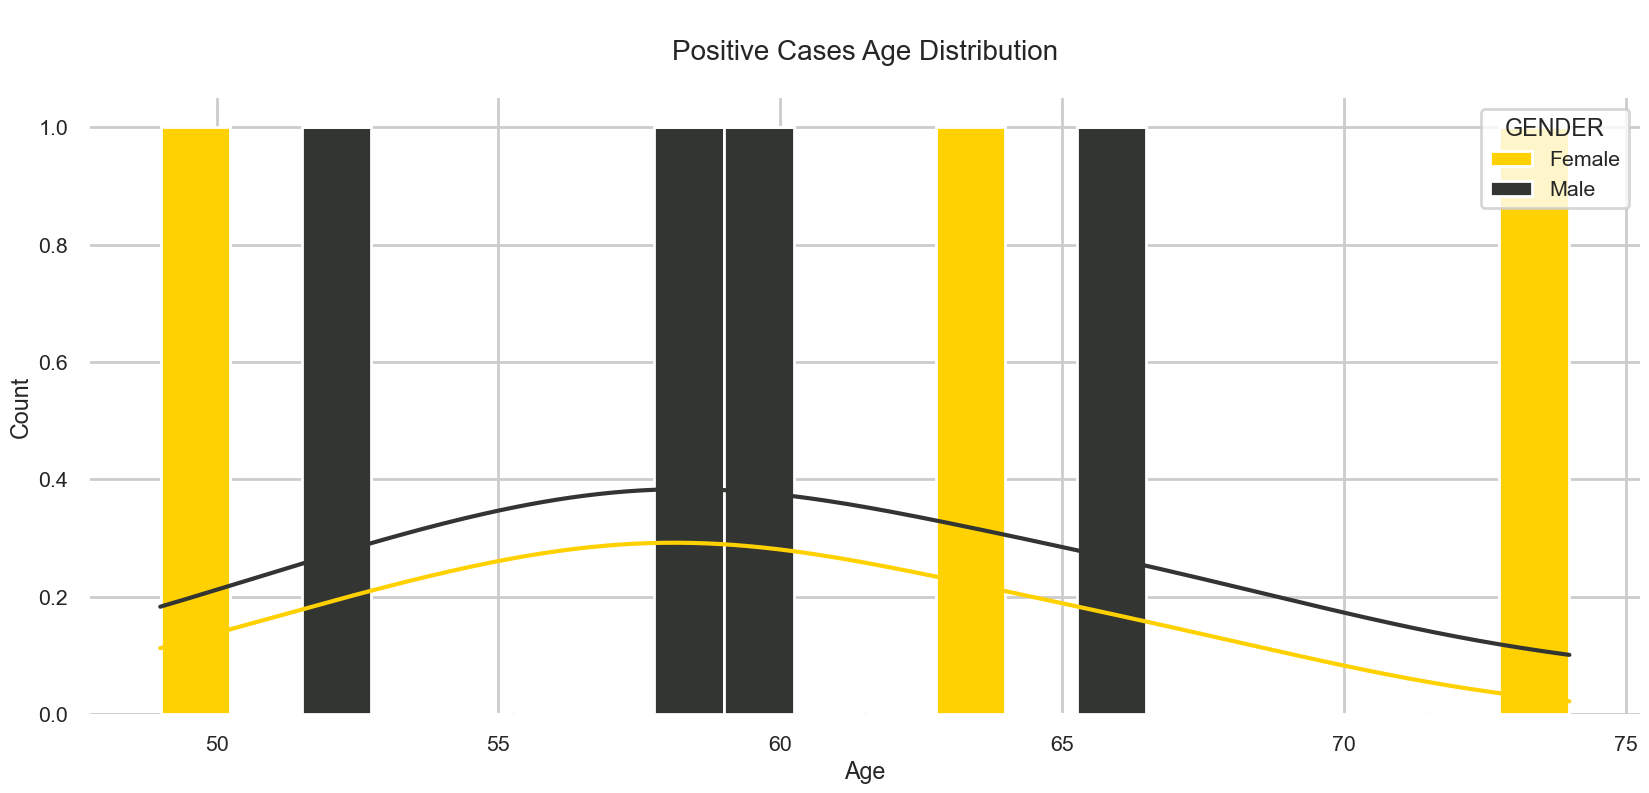

In [45]:
plt.subplots(figsize=(20, 8))

p = sns.histplot(
    data=data_temp_pos,
    x="AGE",
    hue="GENDER",
    multiple="stack",
    palette=palette[11:13],
    kde=True,
    shrink=.99,
    bins=20,
    alpha=1,
    fill=True
)

# Safely set KDE line colors if they exist
if len(p.axes.lines) > 0:
    p.axes.lines[0].set_color(palette[11])
if len(p.axes.lines) > 1:
    p.axes.lines[1].set_color(palette[12])

p.axes.set_title("\nPositive Cases Age Distribution\n", fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()


<a id="9"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Positive Cases' Gender Distribution</p>

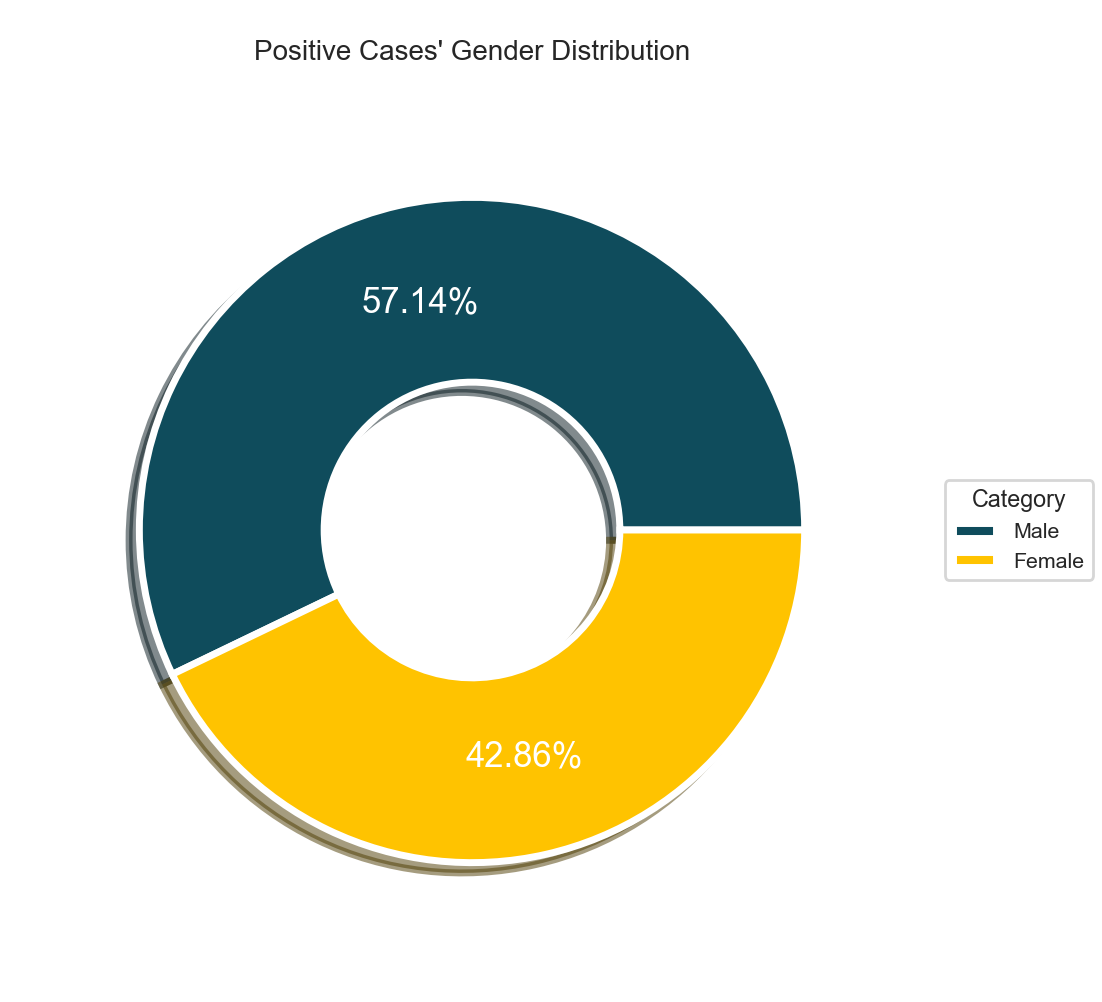

In [46]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = ["#0f4c5c","#FFC300"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()

<a id="10"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Gender-wise Positive Cases' Reasons</p>

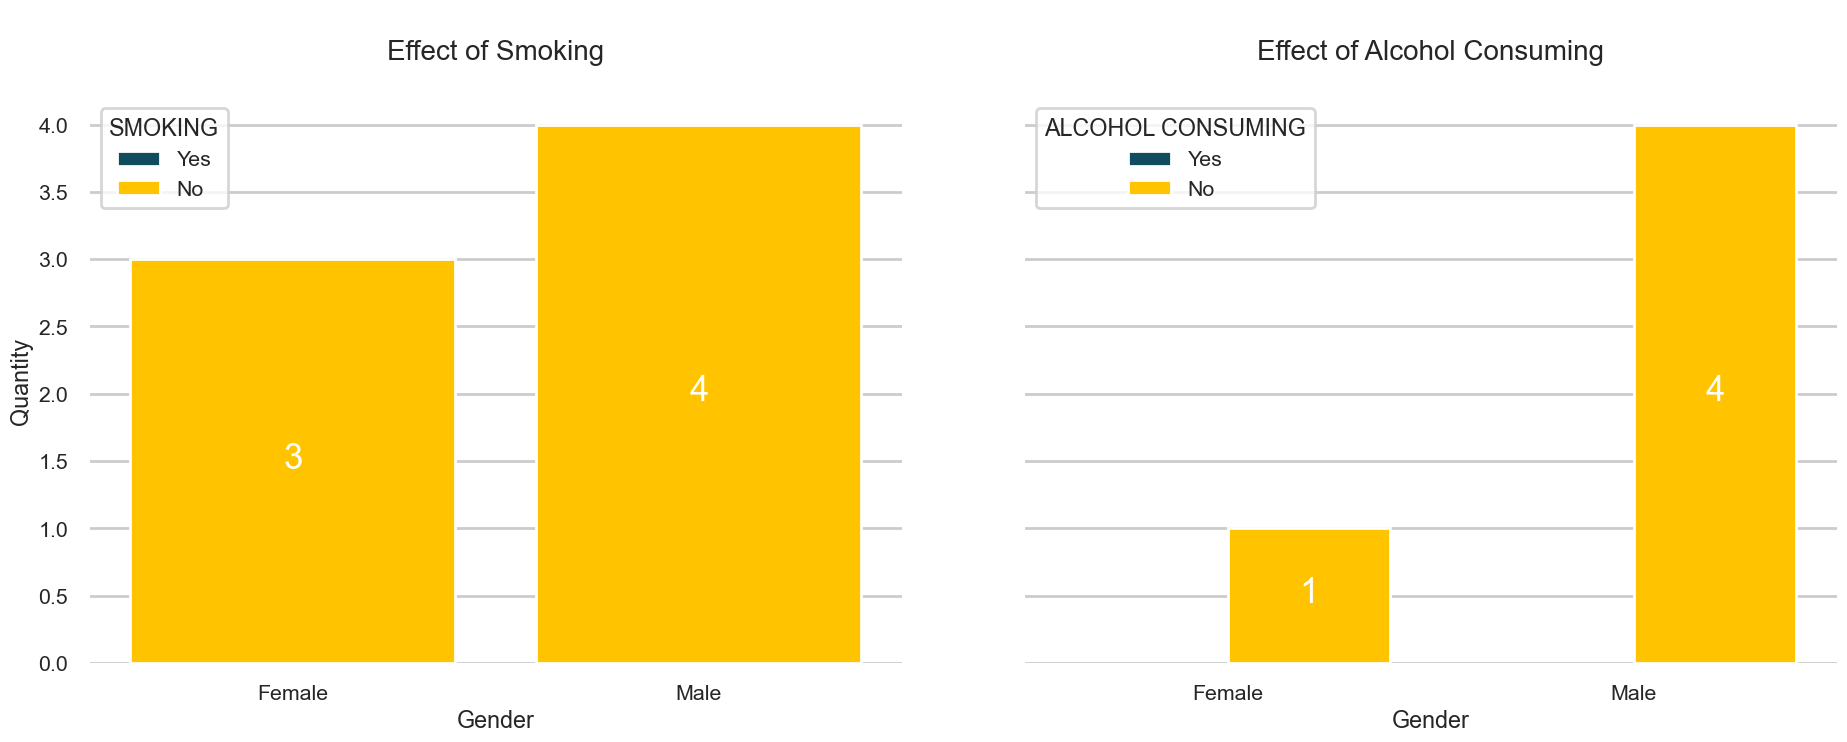

In [47]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SMOKING",hue_order=["Yes","No"],ax=axs[0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0].set_title("\nEffect of Smoking\n",fontsize=20)
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Quantity")
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALCOHOL CONSUMING",hue_order=["Yes","No"],ax=axs[1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1].set_title("\nEffect of Alcohol Consuming\n",fontsize=20)
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Quantity")
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

<a id="11"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Gender-wise Positive Cases' Symptoms</p>

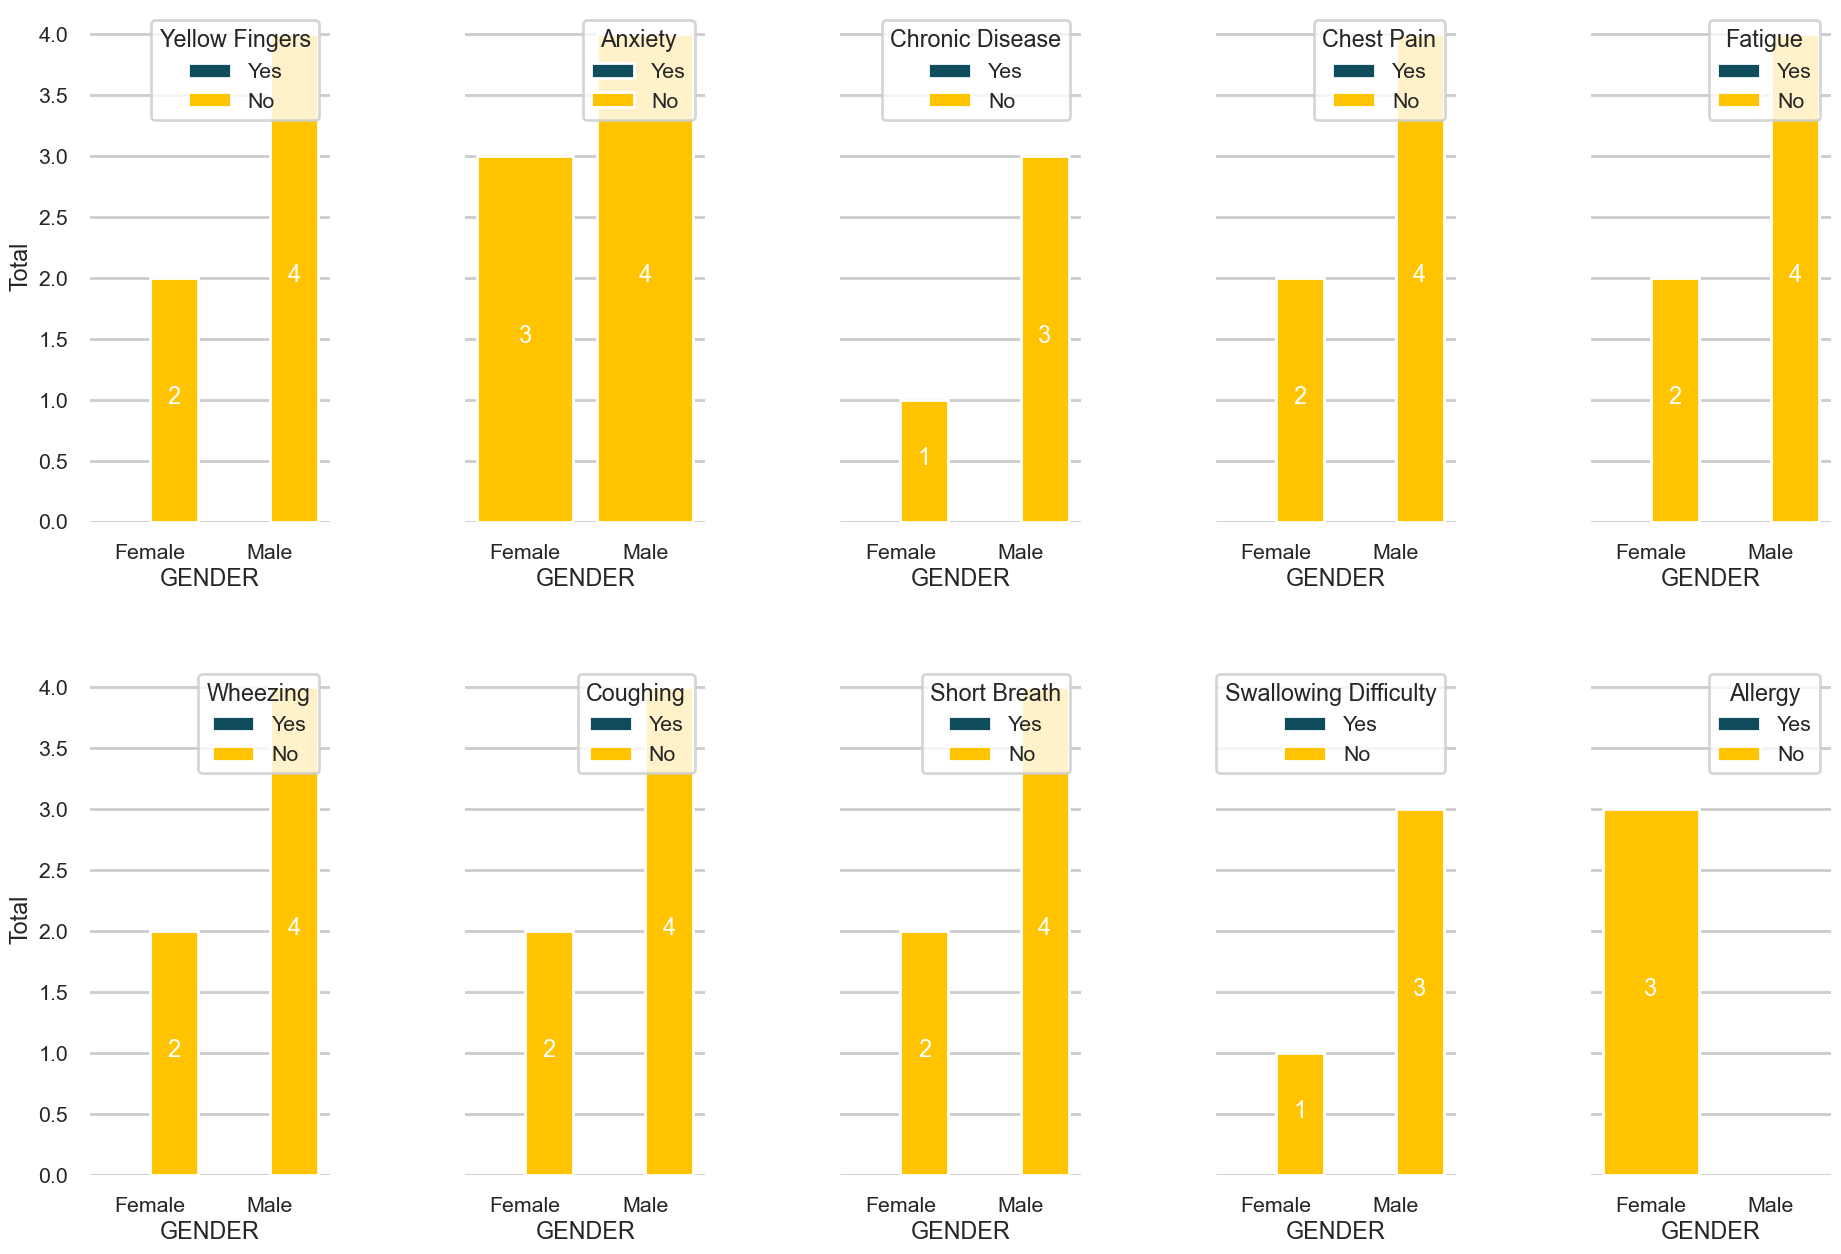

In [50]:
# Strip leading/trailing spaces from column names to prevent errors
data_temp_pos.columns = data_temp_pos.columns.str.strip()

# Create subplot grid
_, axs = plt.subplots(2, 5, figsize=(20, 14), sharex=False, sharey=True)
plt.tight_layout(pad=4.0)

# Define common plot parameters
plot_config = dict(palette=["#0f4c5c", "#FFC300"], saturation=1, hue_order=["Yes", "No"])

# Plot list: (subplot index, feature name, legend title)
features = [
    ((0, 0), "YELLOW_FINGERS", "Yellow Fingers"),
    ((0, 1), "ANXIETY", "Anxiety"),
    ((0, 2), "CHRONIC DISEASE", "Chronic Disease"),
    ((0, 3), "CHEST PAIN", "Chest Pain"),
    ((0, 4), "FATIGUE", "Fatigue"),
    ((1, 0), "WHEEZING", "Wheezing"),
    ((1, 1), "COUGHING", "Coughing"),
    ((1, 2), "SHORTNESS OF BREATH", "Short Breath"),
    ((1, 3), "SWALLOWING DIFFICULTY", "Swallowing Difficulty"),
    ((1, 4), "ALLERGY", "Allergy"),
]

# Loop over features and plot
for (i, j), col, title in features:
    sns.countplot(data=data_temp_pos, x="GENDER", hue=col, ax=axs[i, j], **plot_config)
    axs[i, j].set_ylabel("Total")
    axs[i, j].legend(title=title, loc="upper right")
    for container in axs[i, j].containers:
        axs[i, j].bar_label(container, label_type="center", padding=2, size=17, color="white", rotation=0)

# Final plot tweaks
sns.despine(left=True, bottom=True)
plt.show()



<a id="12"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Heatmap</p>

Let's convert the target feature **"LUNG_CANCER"** from **Categorical** to **Numerical** data type by using **Label Encoder**. And converting the **"GENDER"** column from **Categorical** to **Numerical** data type by using **"One Hot Encoder"** for avoiding unexpected gender bias.

In [51]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE", "YELLOW_FINGERS" : "YELLOW FINGERS", "PEER_PRESSURE" : "PEER PRESSURE", "LUNG_CANCER" : "LUNG CANCER", "FATIGUE " : "FATIGUE", "ALLERGY " : "ALLERGY"}, inplace=True)
data = data[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,AGE,MALE,FEMALE,ALCOHOL CONSUMING,CHEST PAIN,SHORTNESS OF BREATH,COUGHING,PEER PRESSURE,CHRONIC DISEASE,SWALLOWING DIFFICULTY,YELLOW FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,LUNG CANCER
0,69,True,False,1,1,1,1,1,0,1,0,0,1,0,1,0
1,74,False,True,0,0,1,0,0,0,1,1,1,1,1,1,1
2,59,True,False,1,1,1,1,1,1,0,1,1,1,0,1,1
3,63,False,True,1,1,1,1,0,1,0,0,1,0,1,0,1
4,45,True,False,1,1,0,1,1,0,1,1,1,1,0,1,0


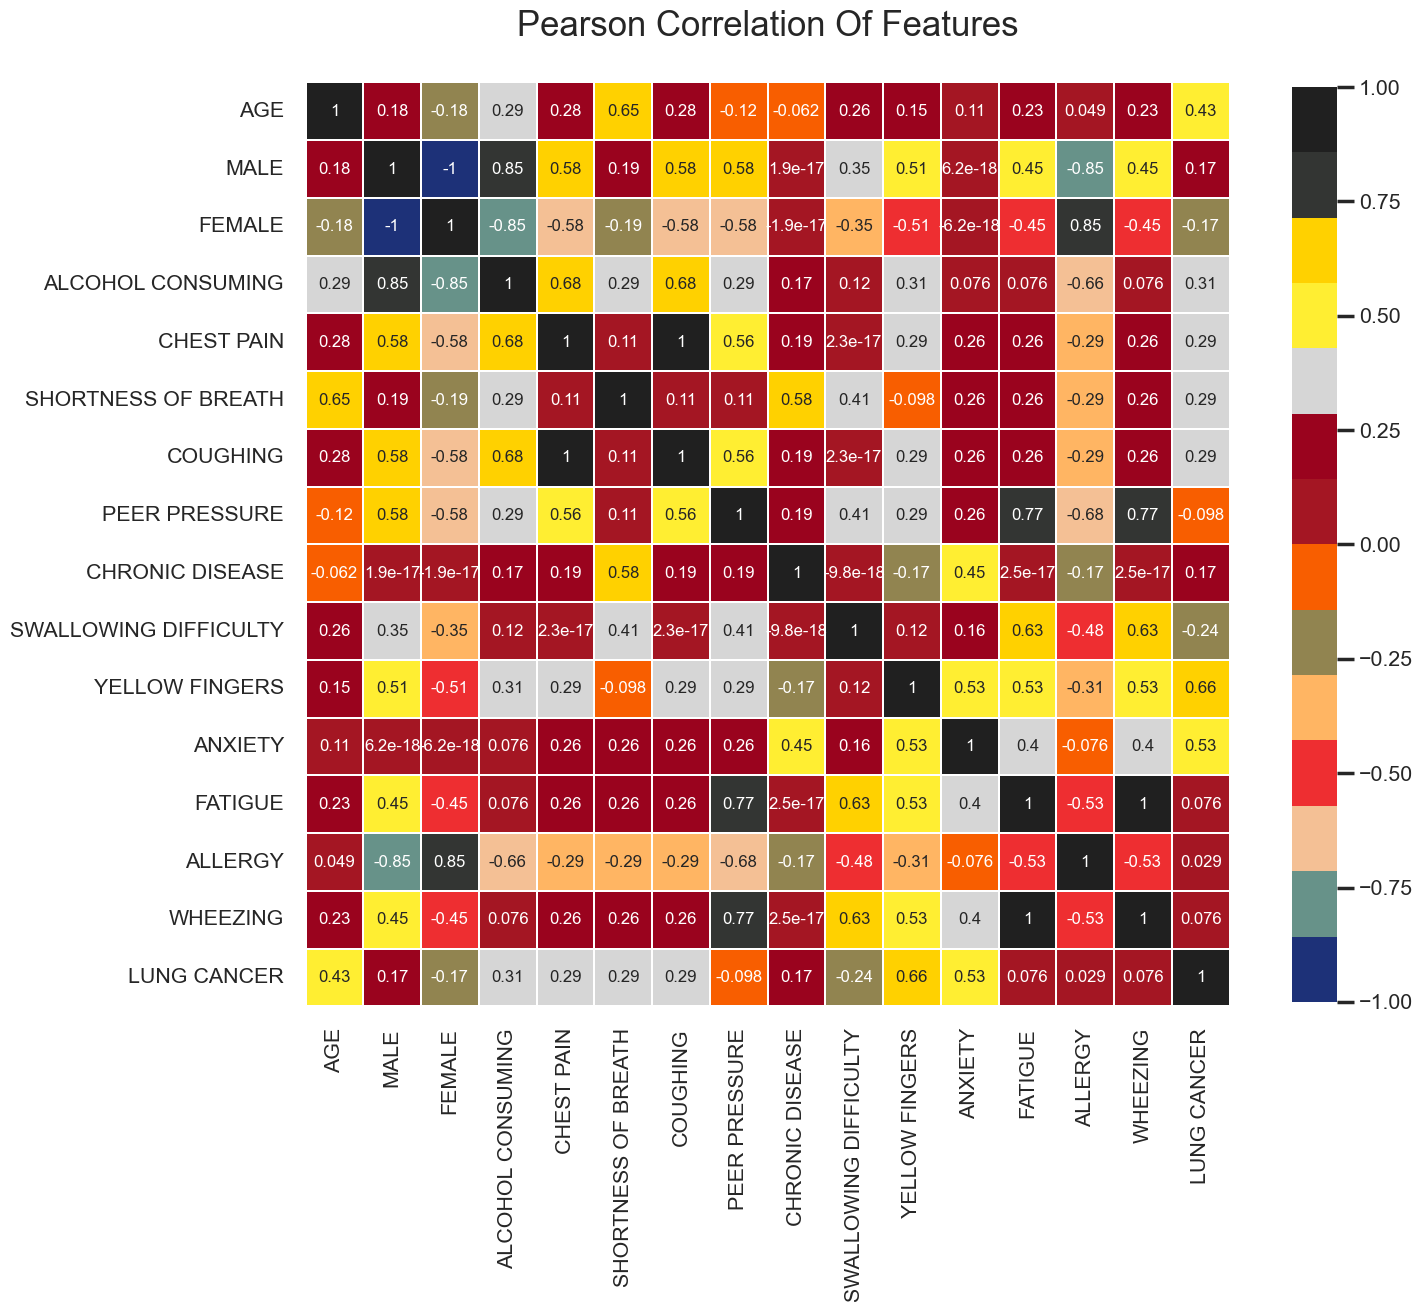

In [52]:
plt.subplots(figsize =(16, 12))

p=sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
p.axes.set_title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

<a id="13"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing For Classification</p>

In [53]:
x = data.drop("LUNG CANCER", axis = 1)
y = data["LUNG CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (9, 15), (9,)
Shape of testing data : (3, 15), (3,)


<a id="14"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Logistic Regression Model</p>

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[0 1]
 [1 1]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3


The Accuracy of Logistic Regression is 33.33 %


<a id="15"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Gaussian Naive Bayes Model</p>

In [55]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[1 0]
 [1 1]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


The Accuracy of Gaussian Naive Bayes is 66.67 %


<a id="16"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Bernoulli Naive Bayes Model</p>

In [56]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[0 1]
 [1 1]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3


The Accuracy of Bernoulli Naive Bayes is 33.33 %


<a id="17"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Support Vector Machine Model</p>

In [57]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[0 1]
 [1 1]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3


The Accuracy of Support Vector Machine is 33.33 %


<a id="18"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Random Forest Model</p>

In [58]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[0 1]
 [1 1]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3


The Accuracy of Random Forest Classifier is 33.33 %


<a id="19"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">K Nearest Neighbors Model</p>

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[0 1]
 [1 1]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3


The Accuracy of K Nearest Neighbors Classifier is 33.33 %


<a id="20"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Extreme Gradient Boosting Model</p>

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

Confusion Matrix : 

[[0 1]
 [0 2]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


The Accuracy of Extreme Gradient Boosting Classifier is 66.67 %


c:\Users\Kalpana\OneDrive\Desktop\python\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:29:23] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Kalpana\OneDrive\Desktop\python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kalpana\OneDrive\Desktop\python\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kalpana\OneDrive\Desktop\python

<a id="21"></a>
# <p style="padding:10px;background-color:yellow;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Neural Network Architecture</p>

In [63]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

regularization_parameter = 0.003

neural_model = Sequential([tf.keras.layers.Dense(units=32, input_dim=(x_train.shape[-1]), activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(units=16,activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=1, activation="sigmoid")
                    ])

print(neural_model.summary())

c:\Users\Kalpana\OneDrive\Desktop\python\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,025 (50.88 KB)

 Trainable params: 13,025 (50.88 KB)

 Non-trainable params: 0 (0.00 B)

None


In [64]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") == 1.0):
            print("\nAccuracy is 100% so canceling training!")
            self.model.stop_training = True

callbacks = myCallback()


neural_model.compile(optimizer = Adam(learning_rate = 0.001), 
                     loss = "binary_crossentropy", 
                     metrics = ["accuracy"])

history = neural_model.fit(x_train, y_train,
                           epochs = 150,
                           verbose = 1,
                           batch_size = 64,
                           validation_data = (x_test, y_test),
                           callbacks = [callbacks])

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7778 - loss: 4.4732 - val_accuracy: 0.6667 - val_loss: 4.4356
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7778 - loss: 4.4217 - val_accuracy: 0.6667 - val_loss: 4.4147
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.7778 - loss: 4.4260 - val_accuracy: 0.6667 - val_loss: 4.3931
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6667 - loss: 4.3808 - val_accuracy: 0.3333 - val_loss: 4.3709
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7778 - loss: 4.3115 - val_accuracy: 0.3333 - val_loss: 4.3480
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8889 - loss: 4.2766 - val_accuracy: 0.3333 - val_loss: 4.3264
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6667 - loss: 4.2839 - val_accuracy: 0.3333 - val_loss: 4.3057
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7778 - loss: 4.2061 - val_accuracy: 0.3333 - val_

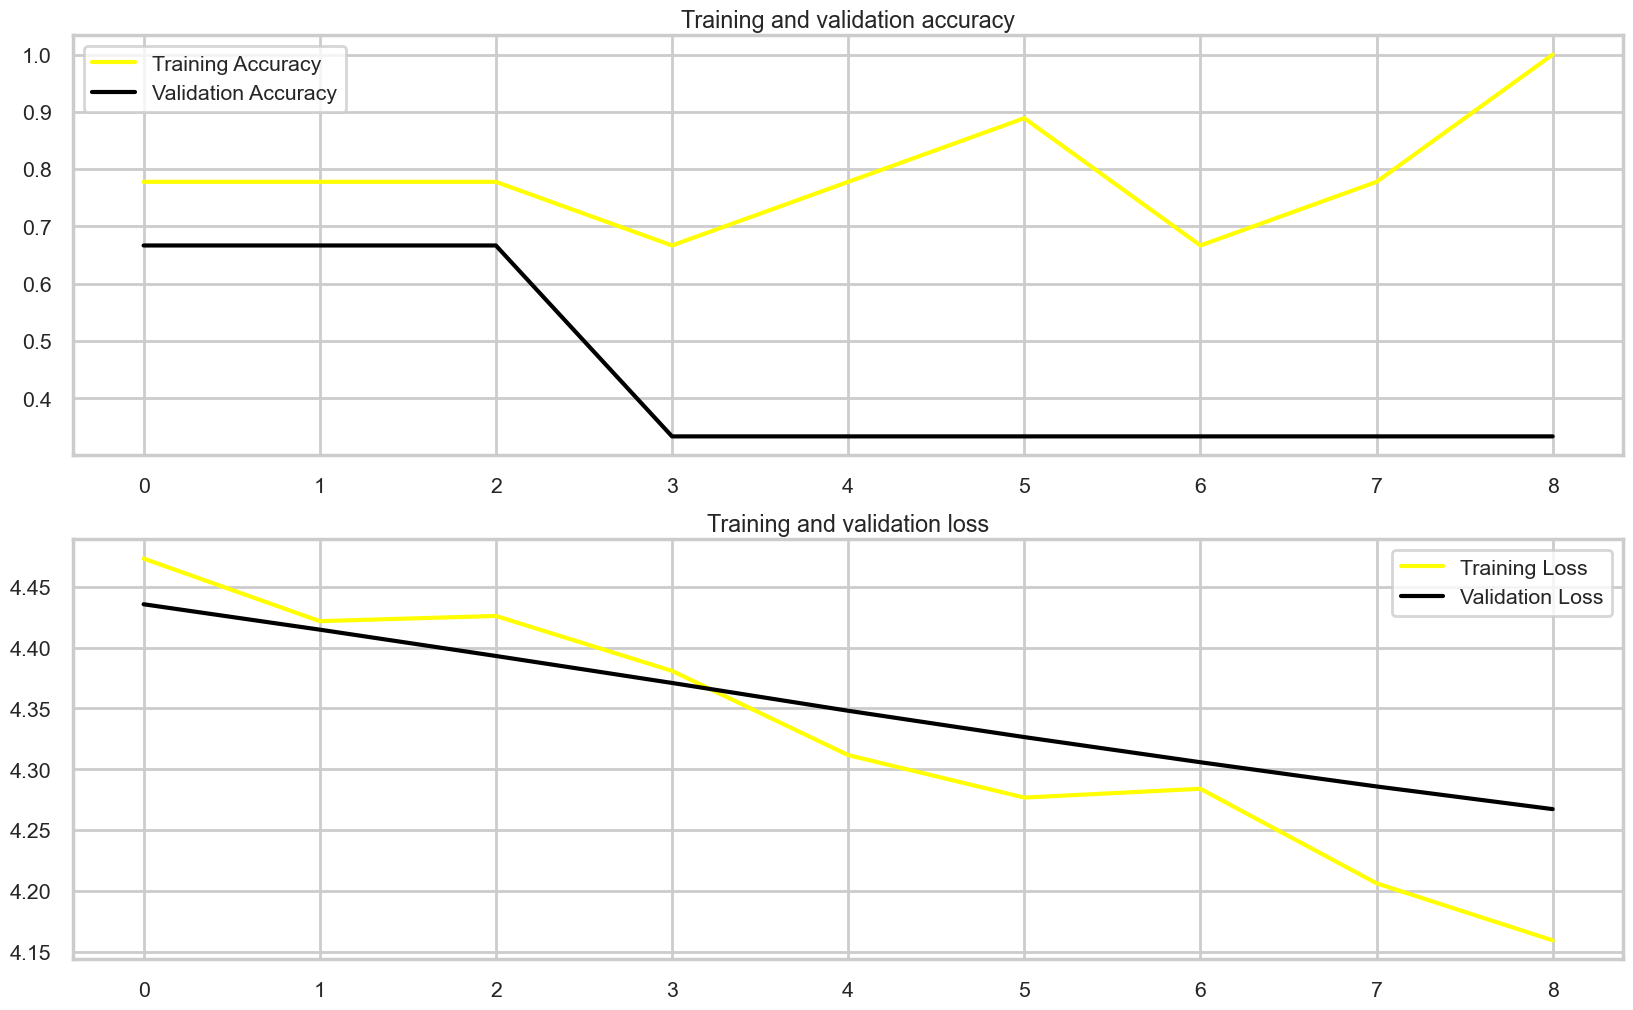

In [65]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc)) # number of epochs

plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
plt.plot(epochs, acc, "yellow", label= "Training Accuracy")
plt.plot(epochs, val_acc, "black", label= "Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.subplot(2,1,2)
plt.plot(epochs, loss, "yellow", label= "Training Loss")
plt.plot(epochs, val_loss, "black", label= "Validation Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()